In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from autosmt_utils import get_gv_framenum
from glob import glob
import re

In [3]:
config = {'illumination_sequence':{
    'ncycles':5,
    'r':30,
    'g':0,
    'v':0,
    'framewindow':30,
    'gfirst':False,
}}

In [4]:
fnums = get_gv_framenum(config)

In [5]:
filenames = glob('../tracking/*csv')

In [6]:
gv_ratios = np.array([])
for f in filenames:
    n = int(re.search(r'\d+', f).group())
    df = pd.read_csv(f)
    v = df['frame'].isin(fnums['vpost']).sum() - df['frame'].isin(fnums['vpre']).sum()
    g = df['frame'].isin(fnums['gpost']).sum() - df['frame'].isin(fnums['gpre']).sum()
    if gv_ratios.size == 0:
        gv_ratios = np.array([n,g,v,g/v])
    else:
        gv_ratios = np.vstack((gv_ratios,np.array([n,g,v,g/v])))

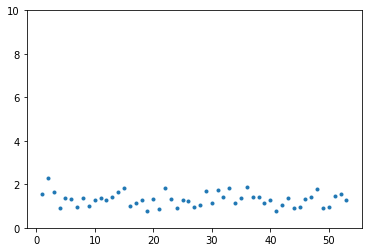

In [7]:
threshold = 0
sel = gv_ratios[:,2]>threshold
plt.plot(gv_ratios[sel,0],gv_ratios[sel,3],'.')
plt.ylim([0,10]);

In [11]:
!mkdir gv
np.savetxt('gv/gv.csv',gv_ratios)